In [1]:
from recast.CPT import CPT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Croatian site 

In [2]:
# Sibenik
layout = CPT()
layout.MESH_EXTENT = 3500
layout.AVERAGE_RANGE = 4000
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'
layout.set_utm_zone('33T')
layout.MAX_ELEVATION_ANGLE = 7

points = np.array([
[576697.34, 4845753, 395 + 80],
[576968, 4845595, 439 + 80],
[577215, 4845425, 423 + 80],
[577439, 4845219, 430 + 80],
[577752, 4845005, 446 + 80],
[577979, 4844819, 478 + 80],
[578400, 4844449, 453 + 80],
[578658, 4844287, 450 + 80],
[578838, 4844034, 430 + 80],
[578974, 4843842, 417 + 80],
[579121, 4844186, 413 + 80],
[579246, 4843915, 410 + 80]
])

layout.add_measurement_instances(points = points, points_type = 'misc')
layout.generate_mesh()
layout.optimize_measurements()

Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Measurement points 'misc' added to the measurements dictionary!
Measurements dictionary contains 1 different measurement type(s).
Correct latitudinal zone!
Correct longitudinal zone!
Optimizing misc measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Measurement points 'optimized' added to the measurements dictionary!
Measurements dictionary contains 2 different measurement type(s).


In [3]:
layout.generate_combined_layer(points_type = 'misc')

Generating combined layer for misc measurement points!
Topography layer generated using orography and canopy height.
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1


In [4]:
layout.LAYER_TYPE

array(['orography', 'landcover', 'canopy_height', 'topography',
       'restriction_zones', 'elevation_angle_contrained',
       'range_contrained', 'los_blockage', 'combined',
       'intersecting_angle_contrained', 'second_lidar_placement',
       'aerial_image', 'misc'], dtype='<U29')

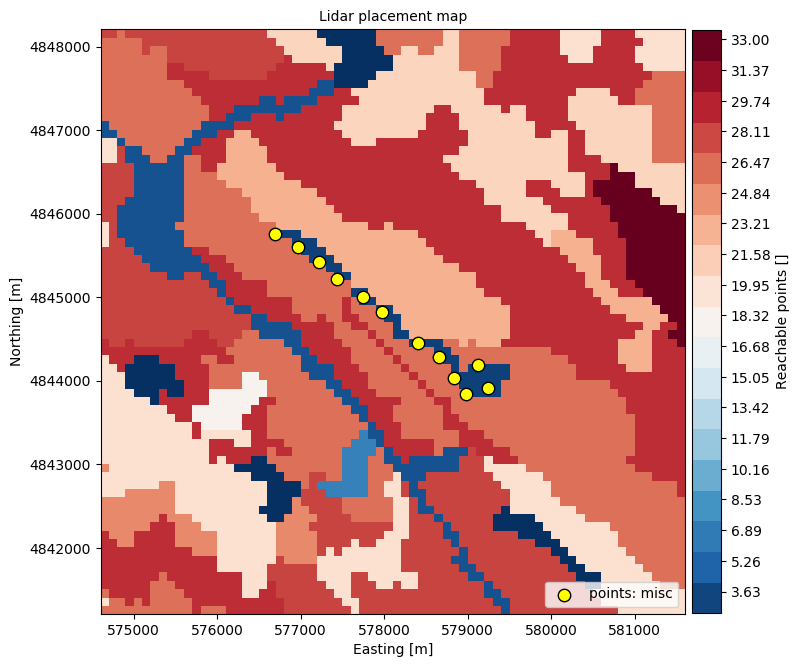

In [5]:
layout.plot_layer(layout.layer_selector('landcover'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [ ]:
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
import pycrs

In [ ]:
data = rasterio.open("/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/landcover_cropped_utm.tif")
data.meta

In [ ]:
data = rasterio.open(layout.LANDCOVER_DATA_PATH)
data.meta

In [ ]:
minx, miny = layout.mesh_corners_utm[0][0], layout.mesh_corners_utm[0][1]
maxx, maxy = layout.mesh_corners_utm[1][0], layout.mesh_corners_utm[1][1]

bbox = box(minx, miny, maxx, maxy)

In [ ]:
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(layout.epsg_code))

In [ ]:
geo = geo.to_crs(crs=data.crs.data)

In [ ]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [ ]:
coords = getFeatures(geo)
print(coords)

In [ ]:
out_img, out_transform = mask(data,coords, crop=True)

In [ ]:
out_transform

In [ ]:
(layout.mesh_corners_utm[0] - layout.mesh_corners_utm[1]) / 100

In [ ]:
from PIL import Image

In [ ]:
im = Image.open('/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/landcover_cropped_utm.tif')

In [ ]:
im.show()

In [ ]:
imarray = np.array(im)

In [ ]:
imarray

In [ ]:
np.flip(imarray,axis=0)

In [ ]:
layout.landcover_layer

In [ ]:
epsg_code = int(data.crs.data['init'][5:])
print(epsg_code)

In [ ]:
out_meta.update({"driver": "GTiff",
                "height": out_img.shape[1],
                "width": out_img.shape[2],
                "transform": out_transform,
                "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()})

In [ ]:
with rasterio.open('/Users/niva/Desktop/tmp/crop.tif', "w", **out_meta) as dest:
    dest.write(out_img)
    

In [ ]:
clipped = rasterio.open('/Users/niva/Desktop/tmp/crop.tif')
show(clipped, cmap='terrain')

In [ ]:
layout.epsg_code

In [ ]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:32633'

with rasterio.open('/Users/niva/Desktop/tmp/crop.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('/Users/niva/Desktop/tmp/crop_utm.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)


In [ ]:
layout.landcover_layer.shape

In [ ]:
layout.add_lidar_instance(position = np.array([580600 + 350,4845700 + 200,100]), lidar_id = 'koshava')
layout.update_lidar_instance(lidar_id = 'koshava', points_type = 'misc')

In [ ]:
layout.generate_second_lidar_layer(lidar_id = 'koshava')

In [ ]:
layout.plot_layer(layout.layer_selector('second_lidar_placement'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [ ]:
layout.add_lidar_instance(position = np.array([580600 + 350,4845700 + 200,100]), lidar_id = 'koshava')
layout.add_lidar_instance(position = np.array([580800 - 1800,4845300 + 2500, 271]), lidar_id = 'whittle')
layout.add_lidar_instance(position = np.array([580600 - 4000,4845700 - 2000,100]), lidar_id = 'sirocco')
layout.add_lidar_instance(position = np.array([580600 - 4000,4845700 + 2000,100]), lidar_id = 'sterenn')

layout.update_lidar_instance(lidar_id = 'koshava', points_type = 'misc')
layout.update_lidar_instance(lidar_id = 'whittle', points_type = 'misc')

In [ ]:
layout.sync_trajectory(lidar_ids = ['whittle', 'koshava'])

In [ ]:
layout.export_measurement_scenario(lidar_id = 'koshava')

In [ ]:
layout.export_range_gate(lidar_id = 'koshava')